# Plotting by cell using analysis.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Need this to get all the cells
tasmax_other = pd.read_csv('tasmax_heatwaves.csv')
tasmax_other = tasmax_other.set_index(['lon', 'lat'])

# Store cells in variable
cells = list(np.unique(tasmax_other.index))

In [4]:
analysis = pd.read_csv('analysis.csv', parse_dates=['year'])
analysis = analysis.set_index(['lon', 'lat', 'year'])
analysis

tasmax_num_days  tasmax_pct_days  tasmax_max_temp  \
lon     lat    year                                                            
-122.75  42.25 2006-01-01               13         0.035592       310.828217   
               2007-01-01               14         0.038330       310.177887   
               2008-01-01                3         0.008214       307.915619   
               2009-01-01               17         0.046543       316.693970   
               2010-01-01               13         0.035592       312.144409   
...                                    ...              ...              ...   
 144.75 -6.25  2094-01-01                9         0.024641       316.924896   
               2095-01-01                6         0.016427       316.329315   
               2096-01-01               10         0.027379       318.168640   
               2097-01-01                6         0.016427       315.393127   
               2098-01-01               35         0.095825       322.137512   

                           tasmin_num_days  tasmin_pct_days  tasmin_max_temp  
lon     lat    year                                                           
-122.75  42.25 2006-01-01               12         0.032854       294.072998  
               2007-01-01               12         0.032854       289.881714  
               2008-01-01                4         0.010951       288.854095  
               2009-01-01               13         0.035592       295.634766  
               2010-01-01               12         0.032854       292.761444  
...                                    ...              ...              ...  
 144.75 -6.25  2094-01-01              305         0.835044       296.912415  
               2095-01-01              302         0.826831       296.972382  
               2096-01-01              256         0.700890       296.531097  
               2097-01-01              297         0.813142       295.959137  
               2098-01-01              258         0.706366       297.205872  

[33852 rows x 6 columns]

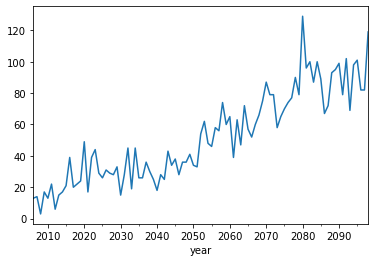

In [5]:
analysis.loc[-122.75, 42.25].tasmax_num_days.plot()

In [6]:
# Creates all the plots in the folder plots_by_cell
# Create folder plots_by_cell manually before running this function
def create_actual_data_plots():
    for i, cell in enumerate(cells):
        fig, axes = plt.subplots(2, 2, figsize=(8, 11), sharex=True)

        data = analysis.loc[cell]
        rolling = data.rolling(window=5, win_type='exponential')
        rolling_mean = rolling.mean(tau=20)

        axes[0, 0].plot(data.tasmax_num_days, 'r', label='Actual')
        axes[0, 0].plot(rolling_mean.tasmax_num_days, 'k', label='Rolling mean')
        axes[0, 0].set(title='Tasmax Num Days')
        axes[0, 0].legend()


        axes[0, 1].plot(data.tasmin_num_days, 'b', label='Actual')
        axes[0, 1].plot(rolling_mean.tasmin_num_days, 'k', label='Rolling mean')
        axes[0, 1].set(title='Tasmin Num Days')
        axes[0, 1].legend()

        axes[1, 0].plot(data.tasmax_max_temp, 'r')
        axes[1, 0].plot(rolling_mean.tasmax_max_temp, 'k')
        axes[1, 0].set(title='Tasmax Max Temperature', xlabel='Date (2006-2099)')

        axes[1, 1].plot(data.tasmin_max_temp, 'b')
        axes[1, 1].plot(rolling_mean.tasmin_max_temp, 'k')
        axes[1, 1].set(title='Tasmin Max Temperature', xlabel='Date (2006-2099)')

        axes[1, 0].set_xticks([])
        axes[1, 1].set_xticks([])

        plt.tight_layout()

        fig.suptitle(f'{cell}')
        # Output to the folder plots_by_cell
        plt.savefig(f'plots_by_cell/{cell}.pdf')
        plt.close()
        print(f'Index {i}/{len(cell)-1} worked for {cell}')      
        

In [7]:
create_actual_data_plots()

Index 0 worked for (-122.75, 42.25)
Index 1 worked for (-119.75, 34.25)
Index 2 worked for (-118.25, 34.75)
Index 3 worked for (-109.75, 31.25)
Index 4 worked for (-106.75, 32.25)
Index 5 worked for (-106.25, 28.75)
Index 6 worked for (-103.25, 25.75)
Index 7 worked for (-102.75, 20.75)
Index 8 worked for (-99.75, 16.75)
Index 9 worked for (-99.75, 17.75)
Index 10 worked for (-98.75, 20.25)
Index 11 worked for (-98.25, 34.75)
Index 12 worked for (-97.75, 25.75)
Index 13 worked for (-97.25, 19.75)
Index 14 worked for (-96.25, 42.25)
Index 15 worked for (-91.25, 14.25)
Index 16 worked for (-90.75, 42.75)
Index 17 worked for (-88.25, 15.25)
Index 18 worked for (-87.75, 42.25)
Index 19 worked for (-85.75, 42.75)
Index 20 worked for (-84.75, 42.75)
Index 21 worked for (-84.25, 33.75)
Index 22 worked for (-79.75, -1.25)
Index 23 worked for (-79.25, 44.25)
Index 24 worked for (-77.75, 21.25)
Index 25 worked for (-76.25, 4.25)
Index 26 worked for (-75.25, 7.75)
Index 27 worked for (-73.75, 18.

Index 230 worked for (74.25, 14.25)
Index 231 worked for (74.25, 17.25)
Index 232 worked for (74.25, 20.75)
Index 233 worked for (74.75, 18.75)
Index 234 worked for (74.75, 26.75)
Index 235 worked for (75.25, 13.75)
Index 236 worked for (75.25, 19.25)
Index 237 worked for (75.25, 21.75)
Index 238 worked for (75.75, 17.75)
Index 239 worked for (76.25, 12.75)
Index 240 worked for (76.75, 25.75)
Index 241 worked for (76.75, 30.75)
Index 242 worked for (76.75, 43.25)
Index 243 worked for (76.75, 66.25)
Index 244 worked for (77.75, 19.75)
Index 245 worked for (78.25, 10.75)
Index 246 worked for (78.25, 12.75)
Index 247 worked for (78.25, 15.25)
Index 248 worked for (78.25, 24.25)
Index 249 worked for (78.75, 11.75)
Index 250 worked for (79.25, 9.75)
Index 251 worked for (79.25, 19.25)
Index 252 worked for (79.75, 28.75)
Index 253 worked for (80.25, 15.75)
Index 254 worked for (80.25, 21.75)
Index 255 worked for (80.75, 16.75)
Index 256 worked for (81.75, 7.75)
Index 257 worked for (81.75, 2